## ----------------------------------Twitter Sentiment Analysis---------------------------------------------

### 1. Import Libraries and Load Data

In [142]:
# regex, string
import re, string

# datatool kit
import pandas as pd
import numpy as np

# spacy 
import spacy

# nltk stopwords, freqdist
from nltk.corpus import stopwords
from nltk import FreqDist

# Term frequency 
from sklearn.feature_extraction.text import TfidfVectorizer

# train-test-split
from sklearn.model_selection import train_test_split
# linear models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# word cloud net

from wordcloud import WordCloud

In [3]:
# Loading the Dataset
df= pd.read_csv("twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


### 2. Data Overview and Basic Cleaning¶
- Column Name correction and lowercasing

In [6]:
df.sample(30)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
71332,11018,TomClancysGhostRecon,Negative,you
43641,10291,PlayerUnknownsBattlegrounds(PUBG),Positive,Clinical PubG is therapeutic
23751,4470,Google,Irrelevant,"This is my 143rd twitter account, I keep getti..."
70366,10855,TomClancysGhostRecon,Negative,@GhostRecon_UK update the new update today kee...
47368,5726,HomeDepot,Neutral,I was most impressed with Falcons D tonight ho...
46984,5661,HomeDepot,Negative,Bu$ine$$ decision. Why waste half your your cu...
55731,2367,CallOfDuty,Irrelevant,Eugene @realDonaldTrump is thanking the Americ...
14832,2941,Dota2,Neutral,A true masterpiece indeed. 2018 may be the mos...
63018,7603,MaddenNFL,Neutral,"My boy has the cannon, but his accuracy wobble..."
25762,822,AssassinsCreed,Positive,or


In [8]:
# sample review 
df.iloc[-1,-1]

'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'

### 3. Standardizing Column Names

In [11]:
# # Drop irrelevant columns that do not contribute to the analysis
df.drop("2401", axis=1, inplace=True)

In [13]:
# Printing Columns names
df.columns

Index(['Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [15]:
# renaming the column name & converting into lowercase
df = df.rename(columns={"Borderlands": "technology_companies", "Positive":"sentiment", "im getting on borderlands and i will murder you all ,": "review"})
df.head()

,technology_companies,sentiment,review
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
# Printing Basic Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   technology_companies  74681 non-null  object
 1   sentiment             74681 non-null  object
 2   review                73995 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [19]:
# Checking for Null Values
df.isna().sum()

technology_companies      0
sentiment                 0
review                  686
dtype: int64

In [25]:
# we can safely drop NaN rows cause its just merely 1% exact 0.9% of data

df.dropna(inplace=True)

In [27]:
# Checking for Duplicates rows
df.duplicated().sum()

3038

In [29]:
# we can safely drop duplicates rows because it is no use
df.drop_duplicates(inplace = True)

### 4. Text Cleaning & Processing

In [37]:
df['review'] = df['review'].astype('str')

In [39]:
stop_words = set(stopwords.words('english'))

def clean(text):
    text = text.lower()
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = " ".join([ word for word in text.split() if word not in stop_words])
    return text

In [41]:
df['cleaned'] =  df['review'].apply(clean)

### 5. Tokenization + lemmatization + NER

In [44]:
nlp = spacy.load("en_core_web_sm")
def process_batch(texts):
    docs = nlp.pipe(texts)
    results = []
    for doc in docs:
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
        results.append(" ".join(tokens))
    return results


In [46]:
df['lemma_text'] = process_batch(df['cleaned'].fillna("").astype(str))

### 6. Frequency Analysis

In [51]:
all_words = " ".join(df['lemma_text']).split()
fdist = FreqDist(all_words)
fdist.most_common(20)

[('game', 10173),
 ('not', 7111),
 ('play', 6460),
 ('good', 5416),
 ('like', 5043),
 ('get', 4010),
 ('2', 4008),
 ('m', 3991),
 ('love', 3626),
 ('new', 3247),
 ('time', 3233),
 ('go', 3209),
 ('fuck', 3083),
 ('look', 2874),
 ('johnson', 2825),
 ('people', 2786),
 ('shit', 2734),
 ('thank', 2641),
 ('3', 2563),
 ('great', 2460)]

## 7. WordCloud

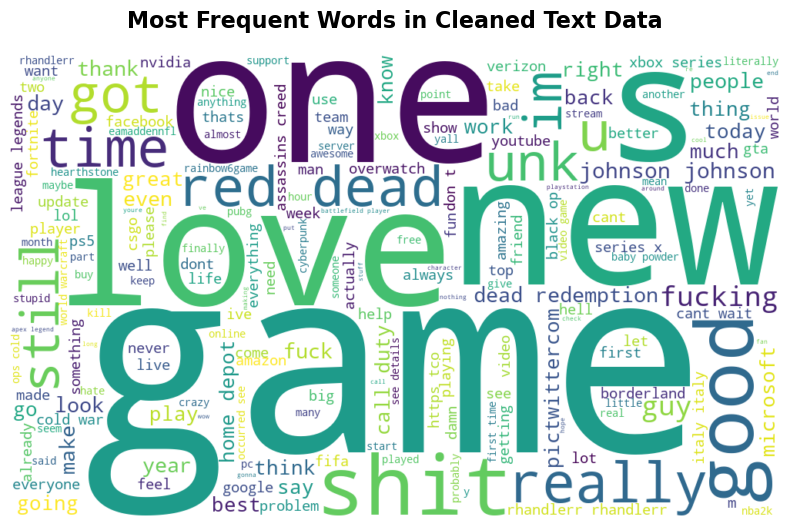

In [60]:
# Create a word cloud to identify the most common words in the 'cleaned' text column
# Larger words indicate higher frequency

text_data = " ".join(df['cleaned'])
wc = WordCloud(
    max_words=200,
    background_color='white',
    colormap='viridis',       
    width=1000,
    height=600,
    random_state=42
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Cleaned Text Data', fontsize=16, fontweight='bold', pad=20)
plt.show()


## 8. Distributions

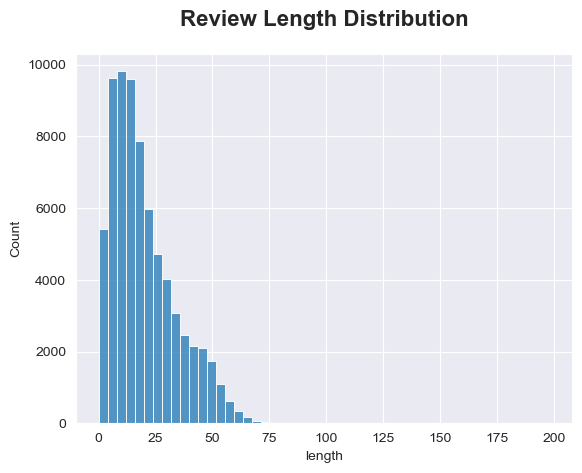

In [65]:
import warnings
warnings.filterwarnings("ignore")

df['length'] = df['review'].apply(lambda x: len(x.split()))

sns.set_style('darkgrid')
sns.histplot(df['length'], bins=50)
plt.title("Review Length Distribution", fontsize=16, fontweight='bold', pad=20)
plt.show()

## 9. Text Representations (TF-IDF)

In [118]:
tfidf = TfidfVectorizer(max_features=18000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['lemma_text'])
y = df['sentiment']

In [120]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

### 10. Train-test-split

In [123]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify=y)

## 11. Model Training 1.0 (Using LogisticRegression )

In [126]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
preds = model.predict(x_test)

## 12. Evaluation 

Accuracy: 0.7659
              precision    recall  f1-score   support

  Irrelevant       0.78      0.65      0.71      2489
    Negative       0.79      0.83      0.81      4313
     Neutral       0.72      0.75      0.74      3480
    Positive       0.76      0.79      0.78      3910

    accuracy                           0.77     14192
   macro avg       0.77      0.75      0.76     14192
weighted avg       0.77      0.77      0.76     14192



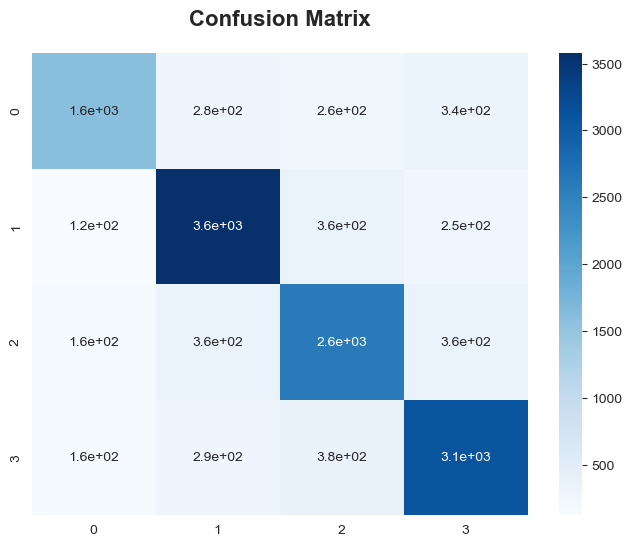

In [144]:
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
plt.figure( figsize = (8,6))
sns.heatmap(cm, annot = True, cmap = "Blues")
plt.title("Confusion Matrix", fontsize=16, fontweight='bold', pad=20)
plt.show()

# 13. Inference on New custom text

In [132]:
# new sentence
new_sentence = ["this movie is good"]

# Transform the sentence using the trained TF-IDF vectorizer
X_new = tfidf.transform(new_sentence)


prediction = model.predict(X_new)[0]
print("Predicted Sentiment:", prediction)

Predicted Sentiment: Positive


##   14. Model Training 2.0 (Using RandomForestClassifier)

In [146]:
# Create classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8850


## 15. Evaluation

              precision    recall  f1-score   support

  Irrelevant       0.94      0.82      0.87      2489
    Negative       0.90      0.91      0.91      4313
     Neutral       0.91      0.86      0.88      3480
    Positive       0.83      0.92      0.87      3910

    accuracy                           0.89     14192
   macro avg       0.89      0.88      0.88     14192
weighted avg       0.89      0.89      0.89     14192



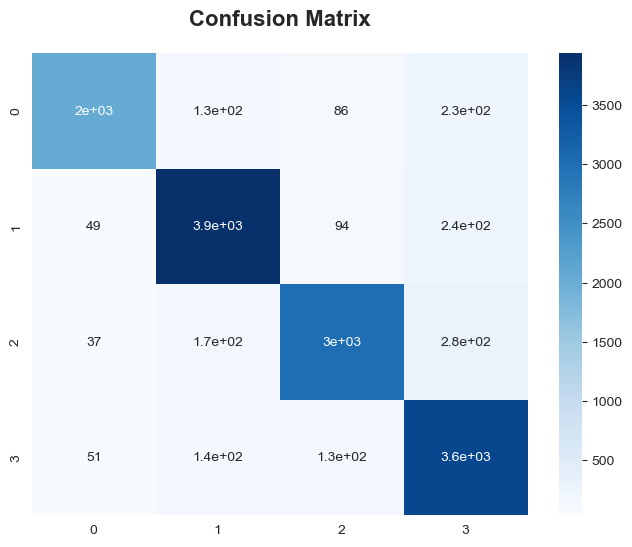

In [148]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure( figsize = (8,6))
sns.heatmap(cm, annot = True, cmap = "Blues")
plt.title("Confusion Matrix", fontsize=16, fontweight='bold', pad=20)
plt.show()

## 16. Inference on New custom text

In [159]:
# new sentence
new_sentence = ["this event is bad"]

# Transform the sentence using the trained TF-IDF vectorizer
X_new = tfidf.transform(new_sentence)


prediction = rf_model.predict(X_new)[0]
print("Predicted Sentiment:", prediction)

Predicted Sentiment: Negative


###  --- 17. Final Accuracy report of both Models (LogisticRegression, RandomForestClassifier)---

In [163]:
lr_accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {lr_accuracy:.4f}")
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.4f}")

Accuracy: 0.7659
Accuracy: 0.8850
